## Linear Regression

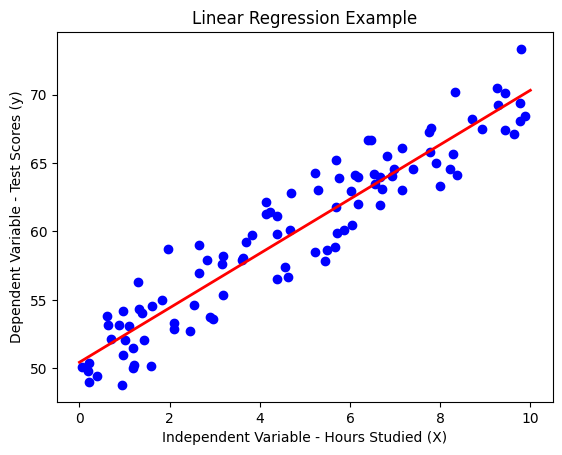

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create some data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Independent variable (hours studied)
y = 2 * X + 50 + np.random.randn(100, 1) * 2  # Dependent variable (test scores)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Make predictions
X_new = np.array([[0], [10]])
y_predict = model.predict(X_new)

# Plotting the results
plt.scatter(X, y, color='blue')  # plot the data points
plt.plot(X_new, y_predict, color='red', linewidth=2)  # plot the regression line
plt.xlabel('Independent Variable - Hours Studied (X)')
plt.ylabel('Dependent Variable - Test Scores (y)')
plt.title('Linear Regression Example')
plt.show()

## Logistic Regression

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Create some data
np.random.seed(0)
X = np.random.rand(100,1) * 10  # Independent variable (e.g., hours studied)
X.sort()
y = (X > 5).astype(np.float64).ravel()  # Dependent variable (e.g., pass/fail)
y[-5:] = 0
y[:5] = 1

In [ ]:

# Create a logistic regression model
model = LogisticRegression()

# Fit the model
model.fit(X, y)

# Make predictions
X_test = np.linspace(0, 10, 300)
y_prob = model.predict_proba(X_test.reshape(-1, 1))[:, 1]

# Plotting the results
plt.scatter(X, y, color='blue')  # plot the data points
plt.plot(X_test, y_prob, color='red', linewidth=2)  # plot the logistic regression curve
plt.xlabel('Independent Variable (X)')
plt.ylabel('Probability of Class 1 (y)')
plt.title('Logistic Regression Example')
plt.show()

## Example: Titanic Predictions Using Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the Titanic dataset
# Replace 'titanic.csv' with the path to your dataset file
titanic_data = pd.read_csv('titanic-train.csv')

# Data Preprocessing
# Select relevant features and handle missing values
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']
titanic_data = titanic_data[selected_features]
titanic_data.dropna(inplace=True)

# Encode categorical features (Sex and Embarked)
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

# Split the dataset into features (X) and target (y)
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


## Support Vector Machine

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create random data
np.random.seed(0)
X = np.random.randn(20, 2)
Y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)

# Visualize the data
# Brown dots are class 1
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Synthetic Data for Binary Classification")
plt.show()

Split the data, train the model and make predictions

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Create an SVM classifier with a linear kernel
from sklearn import svm
clf = svm.SVC(kernel='linear')

# Train the classifier on the training data
clf.fit(X_train, Y_train)

# Make predictions
Y_pred = clf.predict(X_test)

Code for plotting the decision boundary

In [ ]:
def plot_decision_boundary(X, y, classifier):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of SVM')
    plt.show()

Show the resulting classifier

In [ ]:
plot_decision_boundary(X_train, Y_train, clf)

Test a single prediction

In [ ]:
clf.predict(np.array([[-1,0.9]]))

## K-Nearest Neighbors

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate a random binary classification problem.
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Create a KNN classifier model
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(X, y)

# We create a mesh of points to visualize the decision boundaries of the KNN classifier
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                   np.arange(y_min, y_max, 0.02))

# Predict class for each point in the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the results
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Nearest Neighbors Classification')
plt.show()